<a href="https://colab.research.google.com/github/LeelaParhyar/Typhoid-Analysis-in-Uganda-using-Regression-Techniques./blob/main/TYPHOID_ANALYSIS_IN_UGANDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the necessary libraries

In [31]:
# Import libraries for data analysis and manipulation
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for model selection and evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold , cross_val_predict
from sklearn.feature_selection import RFE

# Import libraries for different regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Import library for data preprocessing
from sklearn.preprocessing import StandardScaler

### Loading the Data set

In [32]:
# Load the dataset

# file path to dataset
file_path = "Krigged_Data up to 2017.csv"

# Use pandas to load dataset
df = pd.read_csv(file_path)

# Print the first five rows of the dataset
df.head()

,FID_,DNAME_2011,Typh_Inc,X_coord,Y_coord,HH_Wash,PH_Lands,P_Density,Urban_leve,ARainfall,Temp_Max,Temp_Min,Typh_Rate,Pn_Floods,P_male,P_Female,Typh_Per,OBJECTID
0,NaN,ABIM,534,33.730702,2.747649,69,4,45.9,15.900000,102.300003,29.700001,18.500000,0.004946,3.1,52456,55510,0.206406,0
1,NaN,ADJUMANI,137,31.769442,3.225610,80,0,76.2,18.200001,110.000000,30.500000,18.799999,0.000608,5.3,108298,116953,0.052954,1
2,NaN,AGAGO,694,33.346874,2.909709,71,0,65.1,12.800000,104.300003,30.000000,18.400000,0.003047,0.0,110495,117297,0.268251,2
3,NaN,ALEBTONG,236,33.256240,2.267383,85,0,148.0,2.100000,111.900002,29.900000,17.299999,0.001037,1.7,110989,116552,0.091221,3
4,NaN,AMOLATAR,647,32.739009,1.619290,55,0,127.0,14.600000,120.000000,29.500000,17.299999,0.004396,1.7,73014,74152,0.250084,4


### Data preprocessing

In [33]:
# Rename the column "Urban_leve" to "Urban_level"
df = df.rename(columns={'Urban_leve': 'Urban_level'})
df.columns

Index(['FID_', 'DNAME_2011', 'Typh_Inc', 'X_coord', 'Y_coord', 'HH_Wash',
       'PH_Lands', 'P_Density', 'Urban_level', 'ARainfall', 'Temp_Max',
       'Temp_Min', 'Typh_Rate', 'Pn_Floods', 'P_male', 'P_Female', 'Typh_Per',
       'OBJECTID'],
      dtype='object')

In [34]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

FID_           112
DNAME_2011       0
Typh_Inc         0
X_coord          0
Y_coord          0
HH_Wash          0
PH_Lands         0
P_Density        0
Urban_level      0
ARainfall        0
Temp_Max         0
Temp_Min         0
Typh_Rate        0
Pn_Floods        0
P_male           0
P_Female         0
Typh_Per         0
OBJECTID         0
dtype: int64


In [35]:
# Drop the column "FID_"
df.drop("FID_", axis=1, inplace=True)

# Drop the column 'Typh_Per' because it has no description in meta data
df.drop("Typh_Per", axis=1, inplace=True)

# Move the column "OBJECTID" to the first position
columns = list(df.columns)
columns.remove("OBJECTID")
columns = ["OBJECTID"] + columns
df = df[columns]
df

,OBJECTID,DNAME_2011,Typh_Inc,X_coord,Y_coord,HH_Wash,PH_Lands,P_Density,Urban_level,ARainfall,Temp_Max,Temp_Min,Typh_Rate,Pn_Floods,P_male,P_Female
0,0,ABIM,534,33.730702,2.747649,69,4,45.9,15.900000,102.300003,29.700001,18.500000,0.004946,3.1,52456,55510
1,1,ADJUMANI,137,31.769442,3.225610,80,0,76.2,18.200001,110.000000,30.500000,18.799999,0.000608,5.3,108298,116953
2,2,AGAGO,694,33.346874,2.909709,71,0,65.1,12.800000,104.300003,30.000000,18.400000,0.003047,0.0,110495,117297
3,3,ALEBTONG,236,33.256240,2.267383,85,0,148.0,2.100000,111.900002,29.900000,17.299999,0.001037,1.7,110989,116552
4,4,AMOLATAR,647,32.739009,1.619290,55,0,127.0,14.600000,120.000000,29.500000,17.299999,0.004396,1.7,73014,74152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,107,SSEMBABULE,4241,31.340347,-0.025900,70,0,109.0,6.700000,103.900002,27.600000,16.299999,0.016790,3.1,126084,126513
108,108,TORORO,3556,34.082101,0.725155,81,0,433.0,14.000000,130.500000,29.299999,17.000000,0.006877,5.2,250830,266250
109,109,WAKISO,13156,32.446077,0.220433,65,0,1060.0,84.199997,122.099998,26.900000,17.900000,0.006587,21.1,949035,1048383
110,110,YUMBE,919,31.288241,3.520645,70,0,209.0,7.200000,110.099998,29.799999,18.000000,0.001896,5.3,230626,254196


In [36]:
# Calculate the mean of the column "PH_Lands" excluding zeros
mean_ph_lands = df.loc[df['PH_Lands'] != 0, 'PH_Lands'].mean()

# Replace zero values in the column "PH_Lands" with the mean
df['PH_Lands'] = df['PH_Lands'].replace(0, mean_ph_lands)

df

,OBJECTID,DNAME_2011,Typh_Inc,X_coord,Y_coord,HH_Wash,PH_Lands,P_Density,Urban_level,ARainfall,Temp_Max,Temp_Min,Typh_Rate,Pn_Floods,P_male,P_Female
0,0,ABIM,534,33.730702,2.747649,69,4.00,45.9,15.900000,102.300003,29.700001,18.500000,0.004946,3.1,52456,55510
1,1,ADJUMANI,137,31.769442,3.225610,80,4.54,76.2,18.200001,110.000000,30.500000,18.799999,0.000608,5.3,108298,116953
2,2,AGAGO,694,33.346874,2.909709,71,4.54,65.1,12.800000,104.300003,30.000000,18.400000,0.003047,0.0,110495,117297
3,3,ALEBTONG,236,33.256240,2.267383,85,4.54,148.0,2.100000,111.900002,29.900000,17.299999,0.001037,1.7,110989,116552
4,4,AMOLATAR,647,32.739009,1.619290,55,4.54,127.0,14.600000,120.000000,29.500000,17.299999,0.004396,1.7,73014,74152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,107,SSEMBABULE,4241,31.340347,-0.025900,70,4.54,109.0,6.700000,103.900002,27.600000,16.299999,0.016790,3.1,126084,126513
108,108,TORORO,3556,34.082101,0.725155,81,4.54,433.0,14.000000,130.500000,29.299999,17.000000,0.006877,5.2,250830,266250
109,109,WAKISO,13156,32.446077,0.220433,65,4.54,1060.0,84.199997,122.099998,26.900000,17.900000,0.006587,21.1,949035,1048383
110,110,YUMBE,919,31.288241,3.520645,70,4.54,209.0,7.200000,110.099998,29.799999,18.000000,0.001896,5.3,230626,254196


In [37]:
# Get the number of rows and columns
num_rows, num_columns = df.shape

# Print the number of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 112
Number of columns: 16


In [38]:
# Print summary statistics of numerical variables.
summary_stats = df.drop(columns=['OBJECTID']).describe()

summary_stats

,Typh_Inc,X_coord,Y_coord,HH_Wash,PH_Lands,P_Density,Urban_level,ARainfall,Temp_Max,Temp_Min,Typh_Rate,Pn_Floods,P_male,P_Female
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,1.120000e+02
mean,2334.687500,32.398602,1.108921,76.928571,4.540000,297.990179,17.005357,113.266964,28.602679,17.028571,0.006629,4.622321,150397.517857,1.578741e+05
std,7004.813885,1.429334,1.243355,9.710878,1.730542,747.509143,15.589907,14.454585,1.189705,1.238964,0.007833,5.201069,120176.774477,1.315655e+05
min,17.000000,29.681800,-1.222982,51.000000,1.000000,23.000000,1.900000,18.100000,24.700001,12.100000,0.000127,0.000000,31349.000000,2.294400e+04
25%,359.250000,31.254874,0.144675,70.000000,4.405000,105.750000,7.275000,106.325001,27.799999,16.375000,0.001566,1.200000,86153.750000,8.862200e+04
50%,1090.000000,32.526841,1.025632,80.500000,4.540000,216.500000,13.700000,114.149998,28.700001,17.100000,0.004252,3.800000,116810.500000,1.235340e+05
75%,2634.500000,33.683031,1.942605,85.000000,4.540000,297.000000,20.200001,122.825003,29.600000,17.725000,0.008035,5.300000,187371.750000,1.974322e+05
max,73019.000000,34.876671,3.606554,90.000000,10.000000,7928.000000,100.000000,134.399994,30.700001,19.100000,0.048451,33.000000,949035.000000,1.048383e+06


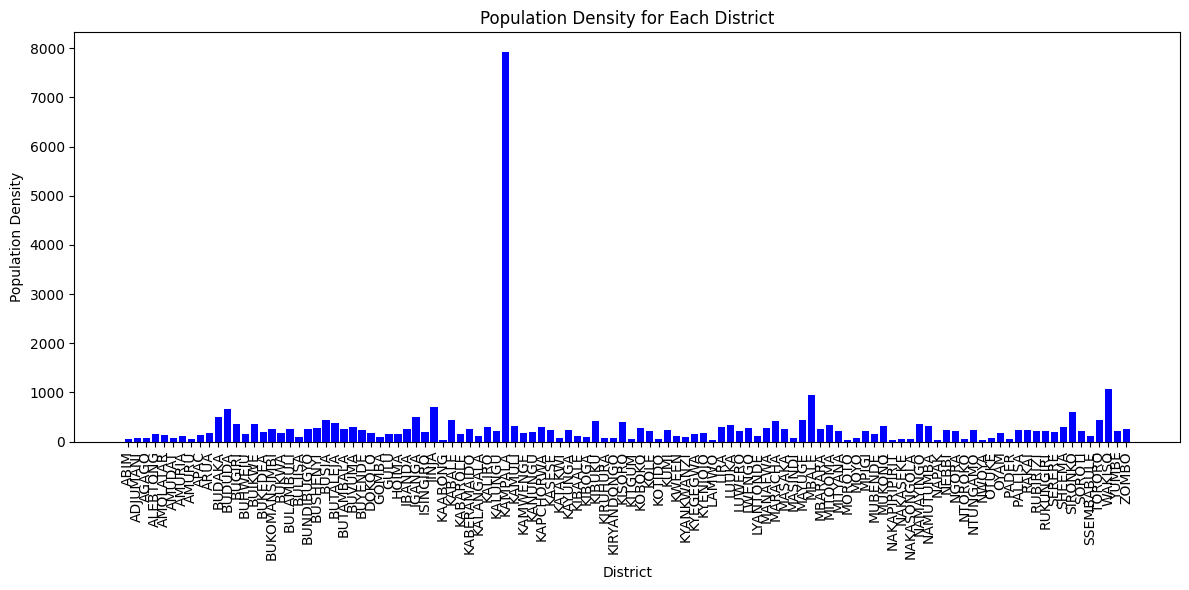

In [39]:
# Group the data by 'DNAME_2011' and calculate the sum of 'Typh_Inc' for each district
district_typhoid_sum = df.groupby('DNAME_2011')['P_Density'].sum()

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(district_typhoid_sum.index, district_typhoid_sum.values, color='blue')
plt.xlabel('District')
plt.ylabel('Population Density')
plt.title('Population Density for Each District')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Feature selection

In [11]:
# Split data into features (X) and target variable (y)
X_before = df[['X_coord', 'Y_coord', 'HH_Wash', 'PH_Lands', 'P_Density', 'Urban_level', 'ARainfall', 'Temp_Max', 'Temp_Min', 'Typh_Inc', 'Pn_Floods', 'P_male', 'P_Female']]
Y = df['Typh_Rate']

# Initialize the regression model
reg_model = RandomForestRegressor()

# Initialize RFE
rfe = RFE(reg_model, n_features_to_select=11)

# Fit RFE
rfe.fit(X_before, Y)

# Get selected features
selected_features = X_before.columns[rfe.support_]

# Filter dataset
X = df[selected_features]

print("Top 11 Relevant Features:")
print(selected_features)

Top 11 Relevant Features:
Index(['X_coord', 'Y_coord', 'HH_Wash', 'P_Density', 'Urban_level', 'Temp_Max',
       'Temp_Min', 'Typh_Inc', 'Pn_Floods', 'P_male', 'P_Female'],
      dtype='object')


In [12]:
# Split the data into training and testing
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
# X_train_val and Y_train val consist of both the training and validation data

# Further split the training data into training and validation
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.5, random_state=42)

#to display the proportions
X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape

((50, 11), (50, 11), (12, 11), (50,), (50,), (12,))

### Feature Scaling

In [13]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training data
X_train_scaled = scaler.transform(X_train)

# Transform the validation data
X_val_scaled = scaler.transform(X_val)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

### Model Selection

In [20]:
# Create a Decision Tree model
DTmodel = DecisionTreeRegressor()

# Train the model on the training data
DTmodel.fit(X_train_scaled, Y_train)

# Predict on the validation data
predictions = DTmodel.predict(X_val_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_val, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_val, predictions)

# Calculate R-squared (R2) score
r2 = r2_score(Y_val, predictions)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 2.5055307959999996e-05
Mean Absolute Error (MAE): 0.00250452
R-squared (R2) Score: 0.046141371500293626


In [21]:
# Create a Random Forest model
RFmodel = RandomForestRegressor(random_state=1)

# Train the model on the training data
RFmodel.fit(X_train, Y_train)

# Predict on the validation data
predictions = RFmodel.predict(X_val)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_val, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_val, predictions)

# Calculate R-squared (R2) score
r2 = r2_score(Y_val, predictions)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 1.3839663982444008e-05
Mean Absolute Error (MAE): 0.0022817436000000003
R-squared (R2) Score: 0.4731223050115395


In [24]:
# Create an SVR
SVRmodel = SVR()

# Train the model on the training data
SVRmodel.fit(X_train_scaled, Y_train)

# Predict on the validation data
predictions = SVRmodel.predict(X_val_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_val, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_val, predictions)

# Calculate R-squared (R2) score
r2 = r2_score(Y_val, predictions)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.00025880236885000006
Mean Absolute Error (MAE): 0.015249100000000002
R-squared (R2) Score: -8.852637732405514


### Hyper parameter tuning

In [23]:
# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest model
rf_model = RandomForestRegressor(random_state=1)

# Initialize GridSearchCV with Random Forest model and hyperparameters grid
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform hyperparameter tuning
grid_search.fit(X_train_scaled, Y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
predictions = best_model.predict(X_val_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(Y_val, predictions)
mae = mean_absolute_error(Y_val, predictions)
r2 = r2_score(Y_val, predictions)

# Print the best hyperparameters and evaluation metrics
print("Best Parameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Mean Squared Error (MSE): 1.1899020818076557e-05
Mean Absolute Error (MAE): 0.0021395289590476194
R-squared (R2) Score: 0.5470028268604861


### Model Testing

In [25]:
# Make predictions on the testing set using the best model
y_pred = best_model.predict(X_test_scaled)

# Evaluate on test data
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 9.523955929023945e-05
Mean Absolute Error (MAE): 0.0042623455317460325
R-squared (R2) Score: 0.41112276187133345
